In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Step 1: Load your data
file_path = r"C:\Users\backo\Downloads\master_data.csv"
df = pd.read_csv(file_path)

print("=== DATA LOADED SUCCESSFULLY ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 10 rows of your data:")
print(df.head(10))

# Check the structure of your data
print("\n=== DATA STRUCTURE ===")
print(df.info())
print("\nEvent types in your data:")
print(df['Event Type'].value_counts())


=== DATA LOADED SUCCESSFULLY ===
Dataset shape: (409, 5)
Columns: ['Time', 'Player number', 'Player Name', 'Event Type', 'Outcome']

First 10 rows of your data:
   Time  Player number Player Name Event Type  Outcome
0  0:53              9         Flo       Pass  Success
1  1:04             10       Anton       Pass  Success
2  1:09              5         Ben       Pass  Failure
3  1:30              8      Berkay       Pass  Success
4  2:49              8      Berkay       Pass  Success
5  2:53              5         Ben       Pass  Success
6  4:34              4        Bobo       Pass  Success
7  4:39              2       Asser       Pass  Failure
8  4:40              2       Asser       Pass  Success
9  4:47              4        Bobo       Pass  Success

=== DATA STRUCTURE ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           

In [2]:
# Step 2: Basic Data Cleaning
# Convert time to numeric minutes for analysis
def time_to_minutes(time_str):
    try:
        if ':' in str(time_str):
            parts = str(time_str).split(':')
            return int(parts[0]) + int(parts[1])/60
        else:
            return float(time_str)
    except:
        return 0

df['Time_minutes'] = df['Time'].apply(time_to_minutes)

# Step 3: Overall Game Analysis
print("\n=== OVERALL GAME ANALYSIS ===")
total_events = len(df)
print(f"Total events recorded: {total_events}")

# Event type distribution
event_counts = df['Event Type'].value_counts()
print("\nEvent Distribution:")
for event, count in event_counts.items():
    percentage = (count / total_events) * 100
    print(f"  {event}: {count} events ({percentage:.1f}%)")


=== OVERALL GAME ANALYSIS ===
Total events recorded: 409

Event Distribution:
  Pass: 141 events (34.5%)
  Tackle: 111 events (27.1%)
  Clearance: 41 events (10.0%)
  Dribble: 36 events (8.8%)
  Long Ball: 31 events (7.6%)
  Throw in: 31 events (7.6%)
  Shot: 9 events (2.2%)
  Cross: 9 events (2.2%)


In [3]:
# Step 4: Player Performance Analysis
print("\n=== PLAYER PERFORMANCE SUMMARY ===")

# Count events per player
player_activity = df['Player Name'].value_counts()
print("Most active players:")
print(player_activity.head(10))


=== PLAYER PERFORMANCE SUMMARY ===
Most active players:
Player Name
Lenni     60
Theo      51
Adam      50
Ben       49
Berkay    33
Bobo      30
Azzam     30
Anton     28
Asser     22
Flo       19
Name: count, dtype: int64


In [4]:
# Step 5: Event Success Analysis
print("\n=== SUCCESS RATES ===")

# Analyze outcomes for each event type
for event_type in df['Event Type'].unique():
    event_data = df[df['Event Type'] == event_type]
    if 'Outcome' in event_data.columns:
        success_rate = (event_data['Outcome'] == 'Success').mean() * 100
        total_events = len(event_data)
        print(f"{event_type}: {success_rate:.1f}% success rate ({total_events} events)")


=== SUCCESS RATES ===
Pass: 68.1% success rate (141 events)
Shot: 0.0% success rate (9 events)
Dribble: 44.4% success rate (36 events)
Long Ball: 29.0% success rate (31 events)
Clearance: 39.0% success rate (41 events)
Tackle: 78.4% success rate (111 events)
Cross: 22.2% success rate (9 events)
Throw in: 45.2% success rate (31 events)


In [5]:
# Step 7: Detailed Pass Analysis (if you have pass data)
if 'Pass' in df['Event Type'].values:
    print("\n=== DETAILED PASS ANALYSIS ===")
    pass_data = df[df['Event Type'] == 'Pass']
    
    # Player passing stats
    pass_summary = pass_data.groupby('Player Name').agg({
        'Outcome': ['count', lambda x: (x == 'Success').sum()]
    }).round(2)
    
    # Flatten column names
    pass_summary.columns = ['Total_Passes', 'Successful_Passes']
    pass_summary['Success_Rate'] = (pass_summary['Successful_Passes'] / pass_summary['Total_Passes'] * 100).round(2)
    
    print("Player Passing Statistics:")
    print(pass_summary.sort_values('Total_Passes', ascending=False))

# Step 8: Time-based Analysis
print("\n=== GAME PHASE ANALYSIS ===")
df['Game_Phase'] = pd.cut(df['Time_minutes'], 
                         bins=[0, 30, 60, 90], 
                         labels=['First Half', 'Second Half Early', 'Second Half Late'])

phase_analysis = df.groupby('Game_Phase')['Event Type'].value_counts().unstack(fill_value=0)
print("Events by Game Phase:")
print(phase_analysis)


=== DETAILED PASS ANALYSIS ===
Player Passing Statistics:
             Total_Passes  Successful_Passes  Success_Rate
Player Name                                               
Lenni                  19                 10         52.63
Berkay                 17                 10         58.82
Ben                    14                  9         64.29
Adam                   13                  8         61.54
Asser                  12                  4         33.33
Azzam                  12                 12        100.00
Bobo                   11                 10         90.91
Theo                   10                  7         70.00
Anton                   9                  6         66.67
Flo                     9                  7         77.78
Benno                   6                  6        100.00
Dardan                  4                  3         75.00
Samy                    4                  3         75.00
Husyein                 1                  1        100.

C:\Users\backo\AppData\Local\Temp\ipykernel_8968\1163778161.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_analysis = df.groupby('Game_Phase')['Event Type'].value_counts().unstack(fill_value=0)


Events by Game Phase:
Event Type         Clearance  Cross  Dribble  Long Ball  Pass  Shot  Tackle  \
Game_Phase                                                                    
First Half                31      7       32         26   121     6      86   
Second Half Early         10      2        4          5    20     3      25   
Second Half Late           0      0        0          0     0     0       0   

Event Type         Throw in  
Game_Phase                   
First Half               29  
Second Half Early         2  
Second Half Late          0  


In [6]:
# Step 7: Detailed Pass Analysis (if you have pass data)
if 'Pass' in df['Event Type'].values:
    print("\n=== DETAILED PASS ANALYSIS ===")
    pass_data = df[df['Event Type'] == 'Pass']
    
    # TEAM ANALYSIS FIRST
    print("--- TEAM PASSING PERFORMANCE ---")
    total_passes = len(pass_data)
    successful_passes = len(pass_data[pass_data['Outcome'] == 'Success'])
    team_success_rate = (successful_passes / total_passes * 100) if total_passes > 0 else 0
    
    print(f"Total Passes: {total_passes}")
    print(f"Successful Passes: {successful_passes}")
    print(f"Team Pass Success Rate: {team_success_rate:.1f}%")
    
    # Pass types analysis if you have the data
    if 'Additional Info' in pass_data.columns:
        print(f"\n--- PASS TYPES BREAKDOWN ---")
        pass_types = pass_data['Additional Info'].value_counts()
        for pass_type, count in pass_types.items():
            type_data = pass_data[pass_data['Additional Info'] == pass_type]
            type_success = len(type_data[type_data['Outcome'] == 'Success'])
            type_success_rate = (type_success / count * 100) if count > 0 else 0
            print(f"{pass_type}: {count} passes, {type_success_rate:.1f}% success")
    
    # INDIVIDUAL PLAYER ANALYSIS - SORTED BY SUCCESS RATE
    print(f"\n--- INDIVIDUAL PLAYER PASSING (Sorted by Success Rate) ---")
    
    # Player passing stats
    pass_summary = pass_data.groupby('Player Name').agg({
        'Outcome': ['count', lambda x: (x == 'Success').sum()],
        'Time_minutes': 'mean'  # Average time of their passes
    }).round(2)
    
    # Flatten column names
    pass_summary.columns = ['Total_Passes', 'Successful_Passes', 'Avg_Time']
    pass_summary['Success_Rate'] = (pass_summary['Successful_Passes'] / pass_summary['Total_Passes'] * 100).round(2)
    
    # Sort by Success Rate (highest first), then by total passes
    pass_summary = pass_summary.sort_values(['Success_Rate', 'Total_Passes'], ascending=[False, False])
    
    print("Player Passing Statistics (Sorted by Success Rate):")
    for player, row in pass_summary.iterrows():
        if row['Total_Passes'] >= 3:  # Only show players with meaningful sample size
            print(f"{player}: {row['Success_Rate']}% success ({row['Successful_Passes']}/{row['Total_Passes']} passes)")

# Step 8: Time-based Analysis
print("\n=== GAME PHASE ANALYSIS ===")
df['Game_Phase'] = pd.cut(df['Time_minutes'], 
                         bins=[0, 30, 60, 90], 
                         labels=['First Half', 'Second Half Early', 'Second Half Late'])

# Team performance by game phase
print("--- TEAM PERFORMANCE BY GAME PHASE ---")
phase_analysis = df.groupby('Game_Phase')['Event Type'].value_counts().unstack(fill_value=0)

# Calculate success rates by phase for passes
if 'Pass' in df['Event Type'].values:
    print(f"\n--- PASS SUCCESS BY GAME PHASE ---")
    for phase in df['Game_Phase'].unique():
        phase_passes = df[(df['Game_Phase'] == phase) & (df['Event Type'] == 'Pass')]
        if len(phase_passes) > 0:
            success_rate = (phase_passes['Outcome'] == 'Success').mean() * 100
            print(f"{phase}: {success_rate:.1f}% pass success ({len(phase_passes)} passes)")

print("\nEvents by Game Phase:")
print(phase_analysis)

# ADDITIONAL: Overall Player Ranking Across All Events
print(f"\n=== OVERALL PLAYER PERFORMANCE RANKING ===")

# Calculate success rate for each player across all events
player_performance = df.groupby('Player Name').agg({
    'Outcome': ['count', lambda x: (x == 'Success').sum()]
}).round(2)

player_performance.columns = ['Total_Events', 'Successful_Events']
player_performance['Success_Rate'] = (player_performance['Successful_Events'] / player_performance['Total_Events'] * 100).round(2)

# Filter players with meaningful participation (at least 5 events)
meaningful_players = player_performance[player_performance['Total_Events'] >= 5]

if len(meaningful_players) > 0:
    meaningful_players = meaningful_players.sort_values('Success_Rate', ascending=False)
    print("Overall Player Performance (Min. 5 events, Sorted by Success Rate):")
    for player, row in meaningful_players.iterrows():
        print(f"{player}: {row['Success_Rate']}% success ({row['Successful_Events']}/{row['Total_Events']} events)")
else:
    print("Not enough data for overall ranking - need more events per player")

# BONUS: Key Performers Identification
print(f"\n=== KEY PERFORMERS IDENTIFICATION ===")

if 'Pass' in df['Event Type'].values and len(pass_summary) > 0:
    # Most reliable passer (high success rate + decent volume)
    reliable_passers = pass_summary[pass_summary['Total_Passes'] >= 5]
    if len(reliable_passers) > 0:
        best_passer = reliable_passers.iloc[0]
        print(f"Most Reliable Passer: {reliable_passers.index[0]} ({best_passer['Success_Rate']}% success)")

# Most active player
most_active = df['Player Name'].value_counts().index[0]
active_count = df['Player Name'].value_counts().iloc[0]
print(f"Most Active Player: {most_active} ({active_count} total events)")


=== DETAILED PASS ANALYSIS ===
--- TEAM PASSING PERFORMANCE ---
Total Passes: 141
Successful Passes: 96
Team Pass Success Rate: 68.1%

--- INDIVIDUAL PLAYER PASSING (Sorted by Success Rate) ---
Player Passing Statistics (Sorted by Success Rate):
Azzam: 100.0% success (12.0/12.0 passes)
Benno: 100.0% success (6.0/6.0 passes)
Bobo: 90.91% success (10.0/11.0 passes)
Flo: 77.78% success (7.0/9.0 passes)
Dardan: 75.0% success (3.0/4.0 passes)
Samy: 75.0% success (3.0/4.0 passes)
Theo: 70.0% success (7.0/10.0 passes)
Anton: 66.67% success (6.0/9.0 passes)
Ben: 64.29% success (9.0/14.0 passes)
Adam: 61.54% success (8.0/13.0 passes)
Berkay: 58.82% success (10.0/17.0 passes)
Lenni: 52.63% success (10.0/19.0 passes)
Asser: 33.33% success (4.0/12.0 passes)

=== GAME PHASE ANALYSIS ===
--- TEAM PERFORMANCE BY GAME PHASE ---

--- PASS SUCCESS BY GAME PHASE ---
First Half: 69.4% pass success (121 passes)
Second Half Early: 60.0% pass success (20 passes)

Events by Game Phase:
Event Type         Cle

C:\Users\backo\AppData\Local\Temp\ipykernel_8968\2050641359.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_analysis = df.groupby('Game_Phase')['Event Type'].value_counts().unstack(fill_value=0)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Circle, Wedge

def setup_dashboard_style():
    """Set up dashboard styling"""
    plt.style.use('default')
    colors = {
        'primary': '#1A237E',    # Dark blue
        'secondary': '#283593',  # Medium blue
        'accent': '#5C6BC0',     # Light blue
        'success': '#4CAF50',    # Green
        'warning': '#FF9800',    # Orange
        'danger': '#F44336',     # Red
        'text': '#212121',       # Dark gray
        'background': '#F5F5F5'  # Light gray
    }
    return colors

def calculate_team_stats(df):
    """Calculate all team statistics"""
    
    # Filter out throw-ins
    rated_df = df[df['Event Type'] != 'Throw-in']
    
    # Team passing stats
    pass_events = rated_df[rated_df['Event Type'] == 'Pass']
    total_passes = len(pass_events)
    successful_passes = len(pass_events[pass_events['Outcome'] == 'Success'])
    pass_success_rate = (successful_passes / total_passes * 100) if total_passes > 0 else 0
    
    # Team shooting stats
    shot_events = rated_df[rated_df['Event Type'] == 'Shot']
    total_shots = len(shot_events)
    shots_on_target = len(shot_events[shot_events['Outcome'].isin(['On Target', 'Goal'])])
    shot_success_rate = (shots_on_target / total_shots * 100) if total_shots > 0 else 0
    
    # Team dribble stats
    dribble_events = rated_df[rated_df['Event Type'] == 'Dribble']
    total_dribbles = len(dribble_events)
    successful_dribbles = len(dribble_events[dribble_events['Outcome'] == 'Success'])
    dribble_success_rate = (successful_dribbles / total_dribbles * 100) if total_dribbles > 0 else 0
    
    # Team clearance stats
    clearance_events = rated_df[rated_df['Event Type'] == 'Clearance']
    total_clearances = len(clearance_events)
    successful_clearances = len(clearance_events[clearance_events['Outcome'] == 'Success'])
    clearance_success_rate = (successful_clearances / total_clearances * 100) if total_clearances > 0 else 0
    
    # Team tackle stats
    tackle_events = rated_df[rated_df['Event Type'] == 'Tackle']
    total_tackles = len(tackle_events)
    successful_tackles = len(tackle_events[tackle_events['Outcome'] == 'Success'])
    tackle_success_rate = (successful_tackles / total_tackles * 100) if total_tackles > 0 else 0
    
    # Long balls (separate from passes)
    long_ball_events = rated_df[rated_df['Event Type'] == 'Long Ball']
    total_long_balls = len(long_ball_events)
    successful_long_balls = len(long_ball_events[long_ball_events['Outcome'] == 'Success'])
    long_ball_success_rate = (successful_long_balls / total_long_balls * 100) if total_long_balls > 0 else 0
    
    team_stats = {
        'passing': {
            'total': total_passes,
            'successful': successful_passes,
            'success_rate': pass_success_rate
        },
        'shooting': {
            'total': total_shots,
            'successful': shots_on_target,
            'success_rate': shot_success_rate
        },
        'dribbling': {
            'total': total_dribbles,
            'successful': successful_dribbles,
            'success_rate': dribble_success_rate
        },
        'clearance': {
            'total': total_clearances,
            'successful': successful_clearances,
            'success_rate': clearance_success_rate
        },
        'tackling': {
            'total': total_tackles,
            'successful': successful_tackles,
            'success_rate': tackle_success_rate
        },
        'long_balls': {
            'total': total_long_balls,
            'successful': successful_long_balls,
            'success_rate': long_ball_success_rate
        }
    }
    
    return team_stats

def get_top_players_per_stat(df):
    """Get top 5 players for each statistic"""
    
    # Filter out throw-ins
    rated_df = df[df['Event Type'] != 'Throw-in']
    
    top_players = {}
    
    # Top passers (by successful passes)
    pass_events = rated_df[rated_df['Event Type'] == 'Pass']
    if not pass_events.empty:
        player_passes = pass_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_passes.columns = ['total', 'successful']
        player_passes['success_rate'] = (player_passes['successful'] / player_passes['total'] * 100).round(1)
        top_players['passing'] = player_passes.nlargest(5, 'successful')
    
    # Top shooters (by shots on target)
    shot_events = rated_df[rated_df['Event Type'] == 'Shot']
    if not shot_events.empty:
        player_shots = shot_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: x.isin(['On Target', 'Goal']).sum()]
        }).round(2)
        player_shots.columns = ['total', 'successful']
        player_shots['success_rate'] = (player_shots['successful'] / player_shots['total'] * 100).round(1)
        top_players['shooting'] = player_shots.nlargest(5, 'successful')
    
    # Top dribblers (by successful dribbles)
    dribble_events = rated_df[rated_df['Event Type'] == 'Dribble']
    if not dribble_events.empty:
        player_dribbles = dribble_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_dribbles.columns = ['total', 'successful']
        player_dribbles['success_rate'] = (player_dribbles['successful'] / player_dribbles['total'] * 100).round(1)
        top_players['dribbling'] = player_dribbles.nlargest(5, 'successful')
    
    # Top clearers (by successful clearances)
    clearance_events = rated_df[rated_df['Event Type'] == 'Clearance']
    if not clearance_events.empty:
        player_clearances = clearance_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_clearances.columns = ['total', 'successful']
        player_clearances['success_rate'] = (player_clearances['successful'] / player_clearances['total'] * 100).round(1)
        top_players['clearance'] = player_clearances.nlargest(5, 'successful')
    
    # Top tacklers (by successful tackles)
    tackle_events = rated_df[rated_df['Event Type'] == 'Tackle']
    if not tackle_events.empty:
        player_tackles = tackle_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_tackles.columns = ['total', 'successful']
        player_tackles['success_rate'] = (player_tackles['successful'] / player_tackles['total'] * 100).round(1)
        top_players['tackling'] = player_tackles.nlargest(5, 'successful')
    
    # Top long ball players (by successful long balls)
    long_ball_events = rated_df[rated_df['Event Type'] == 'Long Ball']
    if not long_ball_events.empty:
        player_long_balls = long_ball_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_long_balls.columns = ['total', 'successful']
        player_long_balls['success_rate'] = (player_long_balls['successful'] / player_long_balls['total'] * 100).round(1)
        top_players['long_balls'] = player_long_balls.nlargest(5, 'successful')
    
    return top_players

def create_team_stats_section(ax, team_stats, colors, stat_type):
    """Create individual team stat visualization"""
    
    stats = team_stats[stat_type]
    
    # Create gauge-style visualization
    theta = np.linspace(0, np.pi, 100)
    r = np.ones(100) * 1
    
    # Background
    ax.fill_betweenx(r, 0, theta, color=colors['background'], alpha=0.3)
    
    # Fill based on success rate
    success_rate = stats['success_rate']
    fill_theta = np.linspace(0, (success_rate/100) * np.pi, 100)
    fill_r = np.ones(100) * 1
    
    # Color based on success rate
    if success_rate >= 80:
        gauge_color = colors['success']
    elif success_rate >= 60:
        gauge_color = colors['warning']
    else:
        gauge_color = colors['danger']
    
    ax.fill_betweenx(fill_r, 0, fill_theta, color=gauge_color, alpha=0.7)
    
    # Add success rate text
    ax.text(0, 0.3, f'{success_rate:.1f}%', fontsize=16, ha='center', va='center', 
            fontweight='bold', color=gauge_color)
    
    # Add total and successful counts
    ax.text(0, -0.1, f"{stats['successful']}/{stats['total']}", fontsize=12, 
            ha='center', va='center', color=colors['text'])
    
    # Add stat type title
    title = stat_type.replace('_', ' ').title()
    ax.text(0, -0.4, title, fontsize=14, ha='center', va='center', 
            fontweight='bold', color=colors['primary'])
    
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.5, 1.2)
    ax.axis('off')

def create_top_players_section(ax, top_players_data, stat_type, colors):
    """Create top 5 players visualization for a specific stat"""
    
    if stat_type not in top_players_data or top_players_data[stat_type].empty:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', 
                transform=ax.transAxes, color=colors['text'], alpha=0.7)
        ax.axis('off')
        return
    
    data = top_players_data[stat_type]
    
    # Prepare data for plotting
    players = data.index.tolist()
    successful_actions = data['successful'].values
    success_rates = data['success_rate'].values
    
    # Create horizontal bars
    y_pos = np.arange(len(players))
    
    # Create bars for successful actions
    bars = ax.barh(y_pos, successful_actions, color=colors['primary'], alpha=0.7, label='Successful')
    
    # Add success rate as text on bars
    for i, (bar, success_rate) in enumerate(zip(bars, success_rates)):
        width = bar.get_width()
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{success_rate}%', ha='left', va='center', fontweight='bold', fontsize=9)
        
        # Add player name
        ax.text(-0.1, bar.get_y() + bar.get_height()/2, players[i], 
                ha='right', va='center', fontweight='bold', fontsize=9)
    
    ax.set_xlabel('Successful Actions')
    ax.set_title(stat_type.replace('_', ' ').title(), fontsize=12, fontweight='bold', color=colors['primary'])
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_facecolor(colors['background'])
    
    # Remove y-axis labels
    ax.set_yticks([])

def create_team_performance_dashboard(df):
    """Create the complete dashboard with team stats and top players"""
    
    print("📊 CREATING TEAM PERFORMANCE DASHBOARD...")
    
    colors = setup_dashboard_style()
    
    # Calculate statistics
    team_stats = calculate_team_stats(df)
    top_players = get_top_players_per_stat(df)
    
    # Create figure with two main sections
    fig = plt.figure(figsize=(20, 16))
    
    # Section 1: Team Overall Stats (Top)
    gs_team = plt.GridSpec(2, 6, figure=fig, top=0.92, bottom=0.55, hspace=0.3, wspace=0.3)
    
    # Section 2: Top Players (Bottom)  
    gs_players = plt.GridSpec(2, 6, figure=fig, top=0.45, bottom=0.05, hspace=0.4, wspace=0.3)
    
    # Team stats titles
    fig.text(0.5, 0.96, 'TEAM OVERALL STATISTICS', fontsize=24, fontweight='bold', 
             ha='center', color=colors['primary'])
    
    # Top players title
    fig.text(0.5, 0.48, 'TOP 5 PLAYERS BY STATISTIC', fontsize=24, fontweight='bold', 
             ha='center', color=colors['primary'])
    
    # Define the order of statistics to display
    stats_order = ['passing', 'shooting', 'dribbling', 'clearance', 'tackling', 'long_balls']
    stat_titles = {
        'passing': 'Passing',
        'shooting': 'Shooting',
        'dribbling': 'Dribbling', 
        'clearance': 'Clearance',
        'tackling': 'Tackling',
        'long_balls': 'Long Balls'
    }
    
    # Create team stats section (6 stats in 2x3 grid)
    for i, stat_type in enumerate(stats_order):
        row = i // 3
        col = i % 3
        ax = fig.add_subplot(gs_team[row, col])
        create_team_stats_section(ax, team_stats, colors, stat_type)
    
    # Create top players section (6 stats in 2x3 grid)
    for i, stat_type in enumerate(stats_order):
        row = i // 3
        col = i % 3
        ax = fig.add_subplot(gs_players[row, col])
        create_top_players_section(ax, top_players, stat_type, colors)
    
    # Add overall team summary
    ax_summary = fig.add_axes([0.75, 0.55, 0.2, 0.35])  # [left, bottom, width, height]
    ax_summary.axis('off')
    
    # Calculate some overall metrics
    total_actions = sum(team_stats[stat]['total'] for stat in stats_order)
    total_successful = sum(team_stats[stat]['successful'] for stat in stats_order)
    overall_success_rate = (total_successful / total_actions * 100) if total_actions > 0 else 0
    
    ax_summary.text(0.1, 0.9, 'TEAM SUMMARY', fontsize=16, fontweight='bold', 
                   color=colors['primary'])
    
    summary_lines = [
        f"Total Actions: {total_actions}",
        f"Successful Actions: {total_successful}",
        f"Overall Success Rate: {overall_success_rate:.1f}%",
        "",
        "Key Statistics:"
    ]
    
    # Add best performing stats
    best_stats = sorted(stats_order, key=lambda x: team_stats[x]['success_rate'], reverse=True)[:3]
    for i, stat in enumerate(best_stats):
        rate = team_stats[stat]['success_rate']
        summary_lines.append(f"• {stat_titles[stat]}: {rate:.1f}%")
    
    for i, line in enumerate(summary_lines):
        ax_summary.text(0.1, 0.8 - i*0.07, line, fontsize=11, color=colors['text'])
    
    plt.savefig('team_stats_dashboard.png', dpi=300, bbox_inches='tight', 
                facecolor=colors['background'])
    plt.close()
    
    print("✅ DASHBOARD CREATED SUCCESSFULLY!")
    print("📁 Saved as: 'team_stats_dashboard.png'")
    
    # Print summary
    print(f"\n📈 TEAM PERFORMANCE SUMMARY:")
    for stat in stats_order:
        stats_data = team_stats[stat]
        print(f"   • {stat_titles[stat]}: {stats_data['success_rate']:.1f}% ({stats_data['successful']}/{stats_data['total']})")
    
    return team_stats, top_players

# MAIN EXECUTION
print("🚀 CREATING TEAM STATISTICS DASHBOARD...")
print("=" * 60)

# First, let's check what event types we have in the data
print("📋 Available Event Types in your data:")
print(df['Event Type'].value_counts())

# Create the dashboard
team_stats, top_players = create_team_performance_dashboard(df)

print("=" * 60)
print("🎯 DASHBOARD FEATURES:")
print("   • Team Overall Statistics (Top Section)")
print("   • Top 5 Players per Statistic (Bottom Section)")
print("   • Passing, Shooting, Dribbling, Clearance, Tackling, Long Balls")
print("   • Success Rates and Total Counts")
print("   • Professional Gauge Visualizations")

# Show some insights
print(f"\n💡 KEY INSIGHTS:")
valid_stats = [stat for stat in team_stats if team_stats[stat]['total'] > 0]
if valid_stats:
    best_stat = max(valid_stats, key=lambda x: team_stats[x]['success_rate'])
    worst_stat = min(valid_stats, key=lambda x: team_stats[x]['success_rate'])
    
    print(f"   • Strongest: {best_stat.replace('_', ' ').title()} ({team_stats[best_stat]['success_rate']:.1f}%)")
    print(f"   • Needs Work: {worst_stat.replace('_', ' ').title()} ({team_stats[worst_stat]['success_rate']:.1f}%)")
    
    # Show top performers
    for stat in ['passing', 'shooting']:
        if stat in top_players and not top_players[stat].empty:
            top_player = top_players[stat].index[0]
            top_count = top_players[stat].iloc[0]['successful']
            print(f"   • Top {stat.title()}: {top_player} ({top_count} successful)")

🚀 CREATING TEAM STATISTICS DASHBOARD...
📋 Available Event Types in your data:
Event Type
Pass         141
Tackle       111
Clearance     41
Dribble       36
Long Ball     31
Throw in      31
Shot           9
Cross          9
Name: count, dtype: int64
📊 CREATING TEAM PERFORMANCE DASHBOARD...
✅ DASHBOARD CREATED SUCCESSFULLY!
📁 Saved as: 'team_stats_dashboard.png'

📈 TEAM PERFORMANCE SUMMARY:
   • Passing: 68.1% (96/141)
   • Shooting: 55.6% (5/9)
   • Dribbling: 44.4% (16/36)
   • Clearance: 39.0% (16/41)
   • Tackling: 78.4% (87/111)
   • Long Balls: 29.0% (9/31)
🎯 DASHBOARD FEATURES:
   • Team Overall Statistics (Top Section)
   • Top 5 Players per Statistic (Bottom Section)
   • Passing, Shooting, Dribbling, Clearance, Tackling, Long Balls
   • Success Rates and Total Counts
   • Professional Gauge Visualizations

💡 KEY INSIGHTS:
   • Strongest: Tackling (78.4%)
   • Needs Work: Long Balls (29.0%)
   • Top Passing: Azzam (12.0 successful)
   • Top Shooting: Flo (3.0 successful)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Circle, Wedge

def setup_dashboard_style():
    """Set up dashboard styling"""
    plt.style.use('default')
    colors = {
        'primary': '#1A237E',    # Dunkelblau
        'secondary': '#283593',  # Mittelblau
        'accent': '#5C6BC0',     # Hellblau
        'success': '#4CAF50',    # Grün
        'warning': '#FF9800',    # Orange
        'danger': '#F44336',     # Rot
        'text': '#212121',       # Dunkelgrau
        'background': '#F5F5F5'  # Hellgrau
    }
    return colors

def calculate_team_stats(df):
    """Berechne alle Team-Statistiken"""
    
    # Filtere Throw-ins heraus
    rated_df = df[df['Event Type'] != 'Throw-in']
    
    # Team Passing-Statistiken
    pass_events = rated_df[rated_df['Event Type'] == 'Pass']
    total_passes = len(pass_events)
    successful_passes = len(pass_events[pass_events['Outcome'] == 'Success'])
    pass_success_rate = (successful_passes / total_passes * 100) if total_passes > 0 else 0
    
    # Team Shooting-Statistiken
    shot_events = rated_df[rated_df['Event Type'] == 'Shot']
    total_shots = len(shot_events)
    shots_on_target = len(shot_events[shot_events['Outcome'].isin(['On Target', 'Goal'])])
    shot_success_rate = (shots_on_target / total_shots * 100) if total_shots > 0 else 0
    
    # Team Dribbling-Statistiken
    dribble_events = rated_df[rated_df['Event Type'] == 'Dribble']
    total_dribbles = len(dribble_events)
    successful_dribbles = len(dribble_events[dribble_events['Outcome'] == 'Success'])
    dribble_success_rate = (successful_dribbles / total_dribbles * 100) if total_dribbles > 0 else 0
    
    # Team Clearance-Statistiken
    clearance_events = rated_df[rated_df['Event Type'] == 'Clearance']
    total_clearances = len(clearance_events)
    successful_clearances = len(clearance_events[clearance_events['Outcome'] == 'Success'])
    clearance_success_rate = (successful_clearances / total_clearances * 100) if total_clearances > 0 else 0
    
    # Team Tackling-Statistiken
    tackle_events = rated_df[rated_df['Event Type'] == 'Tackle']
    total_tackles = len(tackle_events)
    successful_tackles = len(tackle_events[tackle_events['Outcome'] == 'Success'])
    tackle_success_rate = (successful_tackles / total_tackles * 100) if total_tackles > 0 else 0
    
    # Long Balls (separat von Passes)
    long_ball_events = rated_df[rated_df['Event Type'] == 'Long Ball']
    total_long_balls = len(long_ball_events)
    successful_long_balls = len(long_ball_events[long_ball_events['Outcome'] == 'Success'])
    long_ball_success_rate = (successful_long_balls / total_long_balls * 100) if total_long_balls > 0 else 0
    
    team_stats = {
        'Passing': {
            'total': total_passes,
            'successful': successful_passes,
            'success_rate': pass_success_rate
        },
        'Schüsse': {
            'total': total_shots,
            'successful': shots_on_target,
            'success_rate': shot_success_rate
        },
        'Dribblings': {
            'total': total_dribbles,
            'successful': successful_dribbles,
            'success_rate': dribble_success_rate
        },
        'Klären': {
            'total': total_clearances,
            'successful': successful_clearances,
            'success_rate': clearance_success_rate
        },
        'Tacklings': {
            'total': total_tackles,
            'successful': successful_tackles,
            'success_rate': tackle_success_rate
        },
        'Lange Bälle': {
            'total': total_long_balls,
            'successful': successful_long_balls,
            'success_rate': long_ball_success_rate
        }
    }
    
    return team_stats

def get_top_players_per_stat(df):
    """Hole Top 5 Spieler für jede Statistik, sortiert nach Erfolgsrate"""
    
    # Filtere Throw-ins heraus
    rated_df = df[df['Event Type'] != 'Throw-in']
    
    top_players = {}
    
    # Top Passspieler (nach erfolgreichen Pässen)
    pass_events = rated_df[rated_df['Event Type'] == 'Pass']
    if not pass_events.empty:
        player_passes = pass_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_passes.columns = ['total', 'successful']
        player_passes['success_rate'] = (player_passes['successful'] / player_passes['total'] * 100).round(1)
        # Sortiere nach Erfolgsrate (absteigend)
        top_players['Passing'] = player_passes[player_passes['total'] >= 3].nlargest(5, 'success_rate')
    
    # Top Schützen (nach Torschüssen)
    shot_events = rated_df[rated_df['Event Type'] == 'Shot']
    if not shot_events.empty:
        player_shots = shot_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: x.isin(['On Target', 'Goal']).sum()]
        }).round(2)
        player_shots.columns = ['total', 'successful']
        player_shots['success_rate'] = (player_shots['successful'] / player_shots['total'] * 100).round(1)
        # Nur Spieler mit mindestens 1 Schuss
        top_players['Schüsse'] = player_shots[player_shots['total'] >= 1].nlargest(5, 'success_rate')
    
    # Top Dribbler (nach erfolgreichen Dribblings)
    dribble_events = rated_df[rated_df['Event Type'] == 'Dribble']
    if not dribble_events.empty:
        player_dribbles = dribble_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_dribbles.columns = ['total', 'successful']
        player_dribbles['success_rate'] = (player_dribbles['successful'] / player_dribbles['total'] * 100).round(1)
        top_players['Dribblings'] = player_dribbles[player_dribbles['total'] >= 2].nlargest(5, 'success_rate')
    
    # Top Klärer (nach erfolgreichen Klärungen)
    clearance_events = rated_df[rated_df['Event Type'] == 'Clearance']
    if not clearance_events.empty:
        player_clearances = clearance_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_clearances.columns = ['total', 'successful']
        player_clearances['success_rate'] = (player_clearances['successful'] / player_clearances['total'] * 100).round(1)
        top_players['Klären'] = player_clearances[player_clearances['total'] >= 1].nlargest(5, 'success_rate')
    
    # Top Tackler (nach erfolgreichen Tacklings)
    tackle_events = rated_df[rated_df['Event Type'] == 'Tackle']
    if not tackle_events.empty:
        player_tackles = tackle_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_tackles.columns = ['total', 'successful']
        player_tackles['success_rate'] = (player_tackles['successful'] / player_tackles['total'] * 100).round(1)
        top_players['Tacklings'] = player_tackles[player_tackles['total'] >= 2].nlargest(5, 'success_rate')
    
    # Top Lange-Ball-Spieler (nach erfolgreichen langen Bällen)
    long_ball_events = rated_df[rated_df['Event Type'] == 'Long Ball']
    if not long_ball_events.empty:
        player_long_balls = long_ball_events.groupby('Player Name').agg({
            'Outcome': ['count', lambda x: (x == 'Success').sum()]
        }).round(2)
        player_long_balls.columns = ['total', 'successful']
        player_long_balls['success_rate'] = (player_long_balls['successful'] / player_long_balls['total'] * 100).round(1)
        top_players['Lange Bälle'] = player_long_balls[player_long_balls['total'] >= 1].nlargest(5, 'success_rate')
    
    return top_players

def create_team_stats_dashboard(df):
    """Erstelle Dashboard für Team-Statistiken"""
    
    print("📊 ERSTELLE TEAM-STATISTIKEN DASHBOARD...")
    
    colors = setup_dashboard_style()
    
    # Berechne Statistiken
    team_stats = calculate_team_stats(df)
    
    # Erstelle Figure mit mehr Platz
    fig = plt.figure(figsize=(18, 10))
    
    # Definiere Grid mit mehr Abstand
    gs = plt.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.4)
    
    # Titel
    fig.suptitle('TEAM GESAMTSTATISTIKEN', fontsize=24, fontweight='bold', 
                 color=colors['primary'], y=0.95)
    
    # Statistik-Reihenfolge
    stats_order = ['Passing', 'Schüsse', 'Dribblings', 'Klären', 'Tacklings', 'Lange Bälle']
    
    # Erstelle Team-Statistik-Sektionen
    for i, stat_type in enumerate(stats_order):
        row = i // 3
        col = i % 3
        ax = fig.add_subplot(gs[row, col])
        create_team_stat_gauge(ax, team_stats, colors, stat_type)

    
    plt.savefig('team_statistiken_dashboard.png', dpi=300, bbox_inches='tight', 
                facecolor=colors['background'])
    plt.close()
    
    print("✅ TEAM-DASHBOARD ERFOLGREICH ERSTELLT!")
    print("📁 Gespeichert als: 'team_statistiken_dashboard.png'")
    
    return team_stats

def create_team_stat_gauge(ax, team_stats, colors, stat_type):
    """Erstelle Team-Statistik-Anzeige"""
    
    if stat_type not in team_stats or team_stats[stat_type]['total'] == 0:
        ax.text(0.5, 0.5, 'Keine Daten', ha='center', va='center', 
                transform=ax.transAxes, color=colors['text'], alpha=0.7)
        ax.axis('off')
        return
    
    stats = team_stats[stat_type]
    
    # Erstelle Anzeige im Gauge-Stil
    theta = np.linspace(0, np.pi, 100)
    r = np.ones(100) * 1
    
    # Hintergrund
    ax.fill_betweenx(r, 0, theta, color=colors['background'], alpha=0.3)
    
    # Fülle basierend auf Erfolgsrate
    success_rate = stats['success_rate']
    fill_theta = np.linspace(0, (success_rate/100) * np.pi, 100)
    fill_r = np.ones(100) * 1
    
    # Farbe basierend auf Erfolgsrate
    if success_rate >= 80:
        gauge_color = colors['success']
    elif success_rate >= 60:
        gauge_color = colors['warning']
    else:
        gauge_color = colors['danger']
    
    ax.fill_betweenx(fill_r, 0, fill_theta, color=gauge_color, alpha=0.7)
    
    # Füge Erfolgsrate-Text hinzu
    ax.text(0, 0.4, f'{success_rate:.1f}%', fontsize=20, ha='center', va='center', 
            fontweight='bold', color=gauge_color)
    
    # Füge Gesamt- und erfolgreiche Zählungen hinzu
    ax.text(0, 0.1, f"{stats['successful']}/{stats['total']}", fontsize=14, 
            ha='center', va='center', color=colors['text'])
    
    # Füge Statistik-Titel hinzu
    ax.text(0, -0.3, stat_type, fontsize=16, ha='center', va='center', 
            fontweight='bold', color=colors['primary'])
    
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-0.4, 1.3)
    ax.axis('off')

def create_players_dashboard(df):
    """Erstelle Dashboard für Top-Spieler-Statistiken"""
    
    print("👥 ERSTELLE SPIELER-STATISTIKEN DASHBOARD...")
    
    colors = setup_dashboard_style()
    
    # Hole Top-Spieler-Daten
    top_players = get_top_players_per_stat(df)
    
    # Erstelle Figure mit mehr Platz
    fig = plt.figure(figsize=(20, 12))
    
    # Definiere Grid mit mehr Abstand
    gs = plt.GridSpec(2, 3, figure=fig, hspace=0.5, wspace=0.4)
    
    # Titel
    fig.suptitle('TOP 5 SPIELER NACH ERFOLGSRATE', fontsize=24, fontweight='bold', 
                 color=colors['primary'], y=0.95)
    
    # Statistik-Reihenfolge
    stats_order = ['Passing', 'Schüsse', 'Dribblings', 'Klären', 'Tacklings', 'Lange Bälle']
    
    # Erstelle Spieler-Statistik-Sektionen
    for i, stat_type in enumerate(stats_order):
        row = i // 3
        col = i % 3
        ax = fig.add_subplot(gs[row, col])
        create_player_stat_chart(ax, top_players, colors, stat_type)
    
    plt.savefig('spieler_statistiken_dashboard.png', dpi=300, bbox_inches='tight', 
                facecolor=colors['background'])
    plt.close()
    
    print("✅ SPIELER-DASHBOARD ERFOLGREICH ERSTELLT!")
    print("📁 Gespeichert als: 'spieler_statistiken_dashboard.png'")
    
    return top_players

def create_player_stat_chart(ax, top_players_data, colors, stat_type):
    """Erstelle Spieler-Statistik-Diagramm"""
    
    if stat_type not in top_players_data or top_players_data[stat_type].empty:
        ax.text(0.5, 0.5, 'Keine Daten verfügbar', ha='center', va='center', 
                transform=ax.transAxes, color=colors['text'], alpha=0.7)
        ax.axis('off')
        return
    
    data = top_players_data[stat_type]
    
    # Bereite Daten für die Darstellung vor
    players = data.index.tolist()
    success_rates = data['success_rate'].values
    successful_actions = data['successful'].values
    total_actions = data['total'].values
    
    # Erstelle horizontale Balken
    y_pos = np.arange(len(players))
    
    # Erstelle Balken für Erfolgsraten
    bars = ax.barh(y_pos, success_rates, color=colors['primary'], alpha=0.7, height=0.6)
    
    # Füge Erfolgsrate als Text auf den Balken hinzu
    for i, (bar, success_rate, successful, total) in enumerate(zip(bars, success_rates, successful_actions, total_actions)):
        width = bar.get_width()
        
        # Spielername und Details
        player_text = f"{players[i]}\n({successful}/{total})"
        ax.text(-5, bar.get_y() + bar.get_height()/2, player_text, 
                ha='right', va='center', fontweight='bold', fontsize=9)
        
        # Erfolgsrate
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{success_rate}%', ha='left', va='center', fontweight='bold', fontsize=10,
                color=colors['primary'])
    
    ax.set_xlabel('Erfolgsrate (%)', fontsize=11)
    ax.set_title(stat_type, fontsize=14, fontweight='bold', color=colors['primary'], pad=20)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_facecolor(colors['background'])
    ax.set_xlim(0, 100)
    
    # Entferne y-Achsen-Beschriftungen
    ax.set_yticks([])

# HAUPTAUSFÜHRUNG
print(" ERSTELLE DEUTSCHE DASHBOARDS...")
print("=" * 60)

# Zeige verfügbare Event-Types
print("Verfügbare Event-Types in deinen Daten:")
print(df['Event Type'].value_counts())

# Erstelle Team-Dashboard
team_stats = create_team_stats_dashboard(df)

# Erstelle Spieler-Dashboard
top_players = create_players_dashboard(df)

print("=" * 60)
print("✅ BEIDE DASHBOARDS ERFOLGREICH ERSTELLT!")
print("\n📁 GENERIERTE DATEIEN:")
print("   • 'team_statistiken_dashboard.png' - Team Gesamtstatistiken")
print("   • 'spieler_statistiken_dashboard.png' - Top 5 Spieler pro Statistik")

# Zeige Zusammenfassung
print(f"\n📈 TEAM LEISTUNGSZUSAMMENFASSUNG:")
stats_order = ['Passing', 'Schüsse', 'Dribblings', 'Klären', 'Tacklings', 'Lange Bälle']
for stat in stats_order:
    if stat in team_stats and team_stats[stat]['total'] > 0:
        stats_data = team_stats[stat]
        print(f"   • {stat}: {stats_data['success_rate']:.1f}% ({stats_data['successful']}/{stats_data['total']})")

print(f"\n💡 SCHLÜSSELERKENNTNISSE:")
valid_stats = [stat for stat in team_stats if team_stats[stat]['total'] > 0]
if valid_stats:
    best_stat = max(valid_stats, key=lambda x: team_stats[x]['success_rate'])
    worst_stat = min(valid_stats, key=lambda x: team_stats[x]['success_rate'])
    
    print(f"   • Stärkste Statistik: {best_stat} ({team_stats[best_stat]['success_rate']:.1f}%)")
    print(f"   • Verbesserungsbedarf: {worst_stat} ({team_stats[worst_stat]['success_rate']:.1f}%)")

# Zeige Top-Spieler
print(f"\n⭐ TOP-SPIELER NACH STATISTIKEN:")
for stat in ['Passing', 'Schüsse']:
    if stat in top_players and not top_players[stat].empty:
        top_player = top_players[stat].index[0]
        top_rate = top_players[stat].iloc[0]['success_rate']
        print(f"   • Beste/r {stat}: {top_player} ({top_rate}% Erfolgsrate)")

🚀 ERSTELLE DEUTSCHE DASHBOARDS...
📋 Verfügbare Event-Types in deinen Daten:
Event Type
Pass         141
Tackle       111
Clearance     41
Dribble       36
Long Ball     31
Throw in      31
Shot           9
Cross          9
Name: count, dtype: int64
📊 ERSTELLE TEAM-STATISTIKEN DASHBOARD...
✅ TEAM-DASHBOARD ERFOLGREICH ERSTELLT!
📁 Gespeichert als: 'team_statistiken_dashboard.png'
👥 ERSTELLE SPIELER-STATISTIKEN DASHBOARD...
✅ SPIELER-DASHBOARD ERFOLGREICH ERSTELLT!
📁 Gespeichert als: 'spieler_statistiken_dashboard.png'
✅ BEIDE DASHBOARDS ERFOLGREICH ERSTELLT!

📁 GENERIERTE DATEIEN:
   • 'team_statistiken_dashboard.png' - Team Gesamtstatistiken
   • 'spieler_statistiken_dashboard.png' - Top 5 Spieler pro Statistik

📈 TEAM LEISTUNGSZUSAMMENFASSUNG:
   • Passing: 68.1% (96/141)
   • Schüsse: 55.6% (5/9)
   • Dribblings: 44.4% (16/36)
   • Klären: 39.0% (16/41)
   • Tacklings: 78.4% (87/111)
   • Lange Bälle: 29.0% (9/31)

💡 SCHLÜSSELERKENNTNISSE:
   • Stärkste Statistik: Tacklings (78.4%)
  

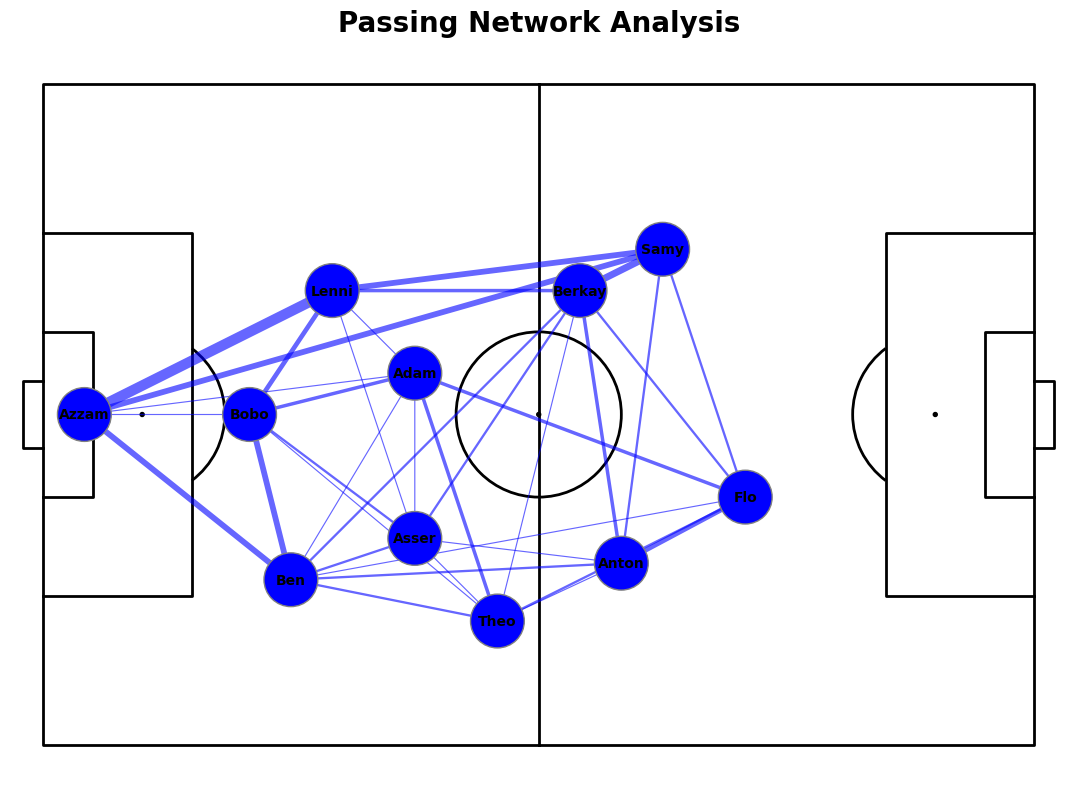

In [17]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# --- 1. File Paths and Data Loading ---

MASTER_DATA_PATH = r"C:\Users\backo\Downloads\master_data.csv"
POSITIONS_PATH = r"C:\Users\backo\Downloads\player_positions.csv"

try:
    pass_data = pd.read_csv(MASTER_DATA_PATH)
    positions = pd.read_csv(POSITIONS_PATH)
except FileNotFoundError as e:
    print(f"ERROR: File not found. Please check your file paths: {e}")
    print("Using dummy data for demonstration. Your plot will only show 'Flo', 'Anton', and 'Ben'.")
    # Dummy data for demonstration if files are missing
    pass_data = pd.DataFrame({
        'Player Name': ['Flo', 'Anton', 'Flo', 'Anton', 'Anton', 'Flo'],
        'Event Type': ['Pass', 'Pass', 'Pass', 'Pass', 'Shot', 'Pass'],
        'Target Player': ['Anton', 'Ben', 'Anton', 'Flo', 'MISS', 'Anton']
    })
    positions = pd.DataFrame({
        'Player Name': ['Flo', 'Anton', 'Ben'],
        'Position': ['FW', 'MF', 'DF'],
        'X': [80, 50, 20],  # StatsBomb Pitch X (0-120)
        'Y': [50, 40, 60]   # StatsBomb Pitch Y (0-80)
    })
    
# --- 2. Data Cleaning and Preparation ---

# FIX: Convert player names to strings to prevent 'float' and 'str' comparison error
pass_data['Player Name'] = pass_data['Player Name'].astype(str)
pass_data['Target Player'] = pass_data['Target Player'].astype(str)
positions['Player Name'] = positions['Player Name'].astype(str)

# Filter for PASSING events only (adjust the list based on your 'Event Type' column)
PASS_EVENTS = ['Pass', 'Long Ball', 'Short Pass', 'Through Ball']
pass_data_filtered = pass_data[pass_data['Event Type'].isin(PASS_EVENTS)].copy()

# Remove passes that did not have a target player (e.g., Target Player is NaN or 'MISS')
pass_data_filtered.dropna(subset=['Target Player'], inplace=True)


# --- 3. Calculate Pass Counts (Edges) and Player Locations (Nodes) ---

# Function to create a unique key for any pair of players (e.g., 'Anton_Flo')
def create_pair_key(row):
    # Sort names alphabetically to count passes in both directions
    players = sorted([row['Player Name'], row['Target Player']])
    return f"{players[0]}_{players[1]}"

pass_data_filtered['pair_key'] = pass_data_filtered.apply(create_pair_key, axis=1)

# Group by the pair key and count the number of passes
lines_df = pass_data_filtered.groupby('pair_key').size().reset_index(name='pass_count')

# Prepare player locations for the plot (Nodes)
# Rename columns for use with the plotting code
scatter_df = positions.rename(columns={'Player Name': 'player_name', 'X': 'x', 'Y': 'y'})
# Set a standard size for player circles
scatter_df['marker_size'] = 1500


# --- 4. Plotting the Pass Network ---

# Initialize the pitch: We'll use a standard 120x80 StatsBomb pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', goal_type='box')
fig, ax = pitch.draw(figsize=(14, 8))

# Calculate max passes for line width scaling
max_pass_count = lines_df['pass_count'].max() or 1 # Use 1 to avoid division by zero if lines_df is empty

## Draw the Lines (Edges)
for i, row in lines_df.iterrows():
    p1_name, p2_name = row['pair_key'].split('_')
    
    # Check if both players have position data
    if p1_name in scatter_df['player_name'].values and p2_name in scatter_df['player_name'].values:
        
        # Get coordinates
        p1_coords = scatter_df.loc[scatter_df['player_name'] == p1_name, ['x', 'y']].iloc[0]
        p2_coords = scatter_df.loc[scatter_df['player_name'] == p2_name, ['x', 'y']].iloc[0]
        
        # Scale line width: thicker line means more passes
        num_passes = row["pass_count"]
        line_width = (num_passes / max_pass_count) * 10 

        # Draw the line
        pitch.lines(
            p1_coords['x'], p1_coords['y'],
            p2_coords['x'], p2_coords['y'], 
            lw=line_width,
            color='blue', # Red color
            alpha=0.6, 
            ax=ax, 
            zorder=2
        )

## Draw the Player Locations (Nodes)
pitch.scatter(
    scatter_df.x, 
    scatter_df.y, 
    s=scatter_df.marker_size, 
    color='blue', 
    edgecolors='grey', 
    linewidth=1, 
    alpha=1, 
    ax=ax, 
    zorder=3
)

## Annotate Player Names
for i, row in scatter_df.iterrows():
    pitch.annotate(
        row.player_name, 
        xy=(row.x, row.y), 
        c='black', 
        va='center', 
        ha='center', 
        weight="bold", 
        size=10, 
        ax=ax, 
        zorder=4
    )

# Set the title and show
fig.suptitle("Passing Network Analysis", fontsize=20, weight='bold')
plt.show()

In [18]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# --- 1. File Paths and Data Loading ---
MASTER_DATA_PATH = r"C:\Users\backo\Downloads\master_data.csv"
POSITIONS_PATH = r"C:\Users\backo\Downloads\player_positions.csv"

# Load your data
pass_data = pd.read_csv(MASTER_DATA_PATH)
positions = pd.read_csv(POSITIONS_PATH)

# --- 2. Data Preparation ---
# Convert player names to strings
pass_data['Player Name'] = pass_data['Player Name'].astype(str)
pass_data['Target Player'] = pass_data['Target Player'].astype(str)
positions['Player Name'] = positions['Player Name'].astype(str)

# Filter for passing events and remove missing targets
PASS_EVENTS = ['Pass', 'Long Ball', 'Long Pass']
pass_data_filtered = pass_data[pass_data['Event Type'].isin(PASS_EVENTS)].copy()
pass_data_filtered.dropna(subset=['Target Player'], inplace=True)

# Create pair keys for pass combinations
def create_pair_key(row):
    players = sorted([row['Player Name'], row['Target Player']])
    return f"{players[0]}_{players[1]}"

pass_data_filtered['pair_key'] = pass_data_filtered.apply(create_pair_key, axis=1)
lines_df = pass_data_filtered.groupby('pair_key').size().reset_index(name='pass_count')

# Prepare player positions
scatter_df = positions.rename(columns={'Player Name': 'player_name', 'X': 'x', 'Y': 'y'})
scatter_df['marker_size'] = 1500

# --- 3. Create and Save Plot as PNG ---
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', goal_type='box')
fig, ax = pitch.draw(figsize=(14, 8))

# Calculate max passes for line width scaling
max_pass_count = lines_df['pass_count'].max() or 1

# Draw pass lines
for i, row in lines_df.iterrows():
    p1_name, p2_name = row['pair_key'].split('_')
    
    if p1_name in scatter_df['player_name'].values and p2_name in scatter_df['player_name'].values:
        p1_coords = scatter_df.loc[scatter_df['player_name'] == p1_name, ['x', 'y']].iloc[0]
        p2_coords = scatter_df.loc[scatter_df['player_name'] == p2_name, ['x', 'y']].iloc[0]
        
        line_width = (row["pass_count"] / max_pass_count) * 10
        pitch.lines(p1_coords['x'], p1_coords['y'], p2_coords['x'], p2_coords['y'], 
                   lw=line_width, color='blue', alpha=0.6, ax=ax, zorder=2)

# Draw player positions
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, 
             color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax, zorder=3)

# Add player names
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', 
                  va='center', ha='center', weight="bold", size=10, ax=ax, zorder=4)

# Set title and save as PNG
fig.suptitle("Passing Network Analysis", fontsize=20, weight='bold')

# Save as PNG file
plt.savefig('passing_network.png', dpi=300, bbox_inches='tight', facecolor='white')
print("PNG file saved as 'passing_network.png'")

# Close the plot to free memory
plt.close()

print("Done!'passing_network.png'")

PNG file saved as 'passing_network.png'
Done!'passing_network.png'
